In [1]:
# import core packages
import warnings
warnings.filterwarnings("ignore")
from itertools import combinations
import os

# import semi-core packages
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
plt.style.use('seaborn-v0_8-poster')
import numpy as np
import pandas as pd
from multiprocessing import Pool
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# import open2c libraries
import bioframe

import cooler
import cooltools
import cooltools.lib.plotting
import cooltools.lib.numutils

from packaging import version
if version.parse(cooltools.__version__) < version.parse('0.5.2'):
    raise AssertionError("tutorial relies on cooltools version 0.5.2 or higher,"+
                         "please check your cooltools version and update to the latest")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Coarse Graining Tool

In [2]:
# coarse grains an input square matrix
def coarse_grainer(input_matrix, res):
    # res is the number of old bins per new bin
    N_input = input_matrix.shape[0]
    N_coarse = int(N_input/res)
    print('N_coarse =',N_coarse)
    output_matrix = np.zeros((N_coarse,N_coarse))
    for i in range(N_coarse):
        for j in range(N_coarse):
            output_matrix[i,j] = np.sum(matrix[i*res:(i+1)*res,j*res:(j+1)*res])
    return output_matrix

# Zoomed out Hi-C

In [3]:
# Load a Hi-C map from a cooler file.
clr_50kb = cooler.Cooler(f'/Users/douglas/Documents/Features_Transfer/store_Hi-C/JJ10_11_17_18.wo3kbCisTransHom.50000.cool')

In [4]:
matrix = clr_50kb.matrix(balance=False)[0:4317,0:4317] # most of maternal chromosome 2
matrix = np.nan_to_num(matrix) # make the nan entries 0
matrix = coarse_grainer(matrix, 10) # coarse grain

N_coarse = 431


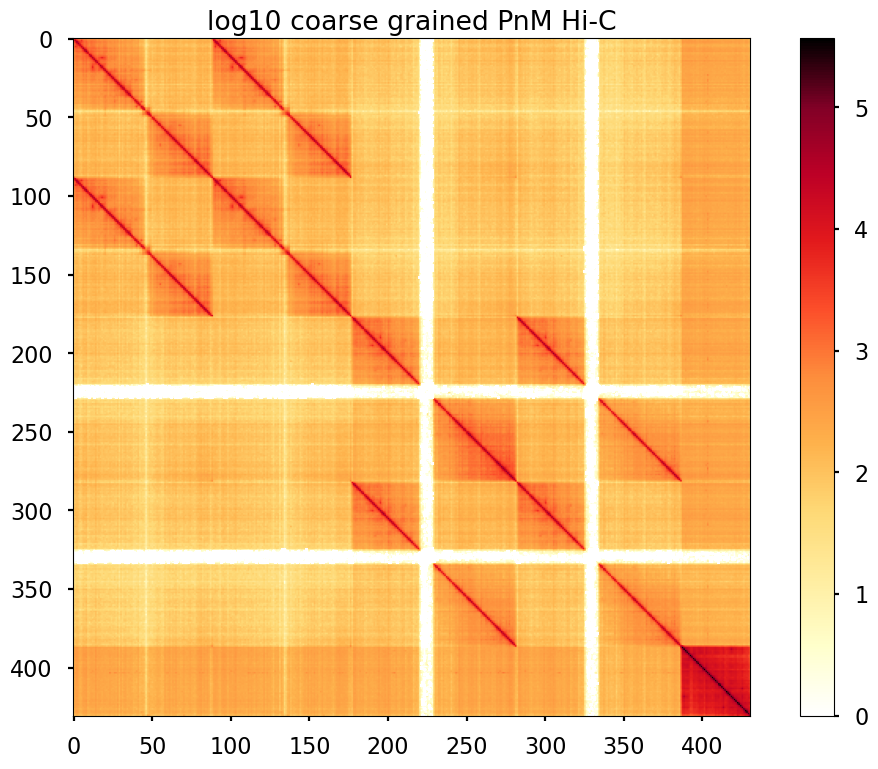

In [5]:
plt.title('log10 coarse grained PnM Hi-C')
plt.imshow(np.log10(matrix),cmap='fall')
plt.colorbar()
plt.show()

# Zoomed in Hi-C

In [6]:
# Load a Hi-C map from a cooler file.
clr_1kb = cooler.Cooler('/Users/douglas/Documents/Features_Transfer/store_Hi-C/JJ10_11_17_18.wo3kbCisTransHom.1000.cool')

### Loose pairing

In [7]:
loose_matrix = clr_1kb.matrix(balance=False)[0:200,0:200] # most of maternal chromosome 2
loose_matrix = np.nan_to_num(loose_matrix) # make the nan entries 0
loose_matrix = coarse_grainer(loose_matrix, 10) # coarse grain

N_coarse = 20


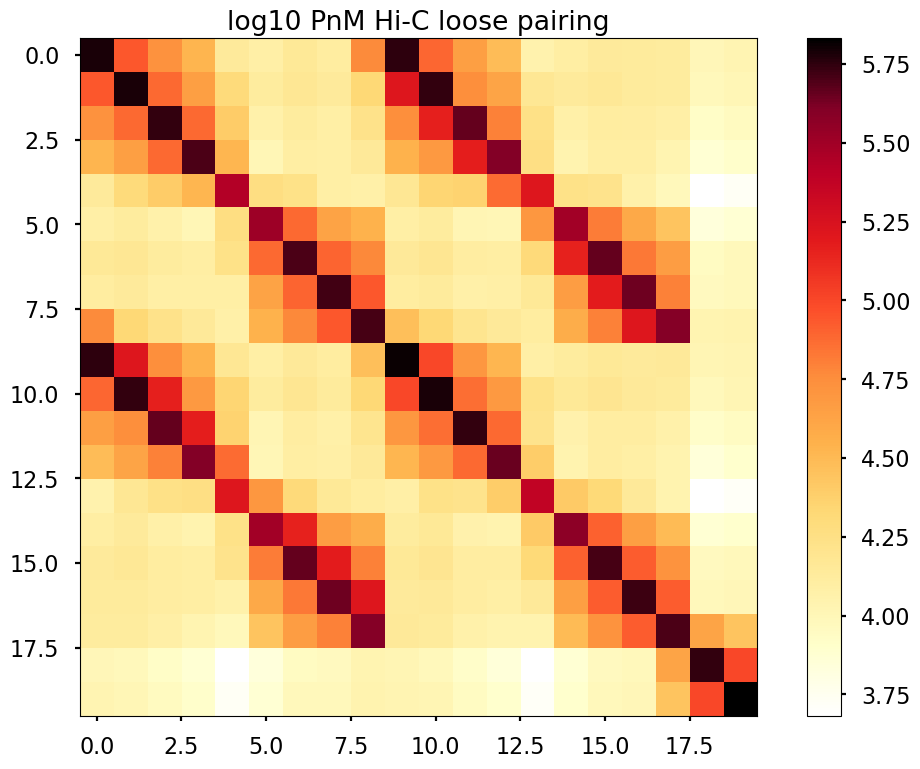

In [8]:
plt.title('log10 PnM Hi-C loose pairing')
plt.imshow(np.log10(loose_matrix),cmap='fall')
plt.colorbar()
plt.show()

### Tight pairing

In [9]:
tight_matrix = clr_1kb.matrix(balance=False)[200:400,200:400] # most of maternal chromosome 2
tight_matrix = np.nan_to_num(tight_matrix) # make the nan entries 0
tight_matrix = coarse_grainer(tight_matrix, 10) # coarse grain

N_coarse = 20


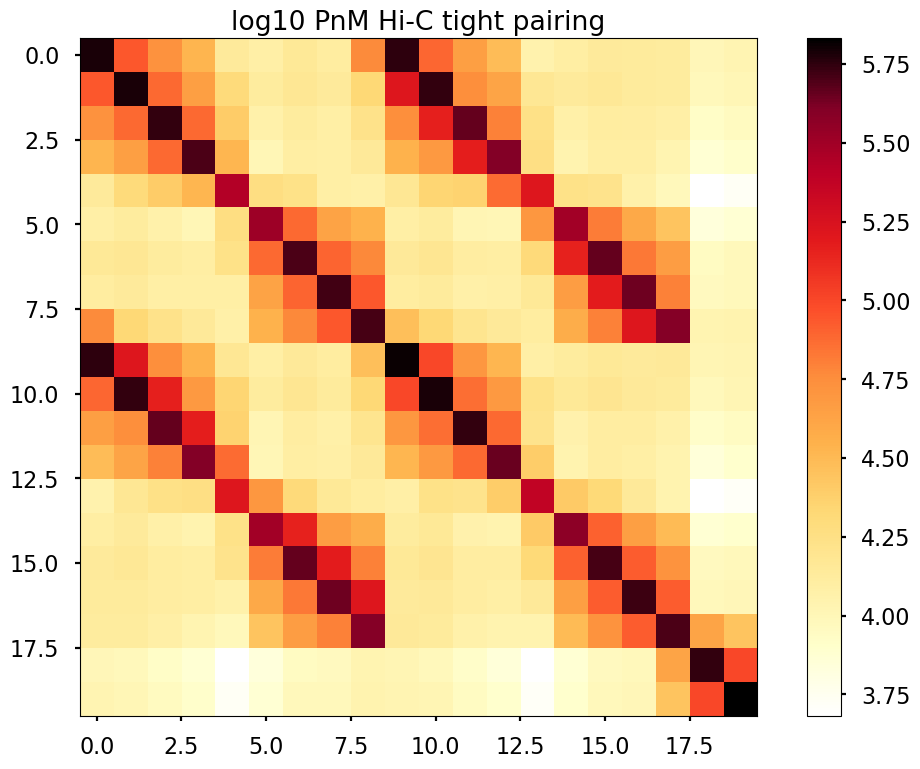

In [10]:
plt.title('log10 PnM Hi-C tight pairing')
plt.imshow(np.log10(tight_matrix),cmap='fall')
plt.colorbar()
plt.show()